In [2]:
import pandas as pd
import darts.utils.timeseries_generation as timegen
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NHiTSModel

In [3]:
dataset1 = timegen.sine_timeseries(start=pd.Timestamp("2024-01-01 00:00:00"), length=100, freq="d", value_frequency=0.05) + 0.1*timegen.gaussian_timeseries(start=pd.Timestamp("2024-01-01 00:00:00"), length=100, freq="d")
dataset2 = timegen.sine_timeseries(start=pd.Timestamp("2024-01-01 00:00:00"), length=100, freq="d", value_frequency=0.02) + 0.2*timegen.gaussian_timeseries(start=pd.Timestamp("2024-01-01 00:00:00"), length=100, freq="d")

In [4]:
multivariate_dataset = dataset2.stack(dataset1)
multivariate_dataset.head(1000)

<TimeSeries (DataArray) (time: 100, component: 2, sample: 1)> Size: 2kB
array([[[-2.10020490e-01],
        [-7.31562336e-02]],

       [[ 3.28935976e-01],
        [ 2.25171778e-01]],

       [[ 3.93118005e-01],
        [ 6.75859970e-01]],

       [[ 6.27040228e-01],
        [ 7.72537451e-01]],

       [[ 7.72816388e-01],
        [ 9.70613481e-01]],

       [[ 6.23947658e-01],
        [ 1.00159638e+00]],

       [[ 3.80433469e-01],
        [ 7.87968055e-01]],
...
       [[-5.98025466e-01],
        [-8.34587928e-01]],

       [[-6.47405386e-01],
        [-8.28132628e-01]],

       [[-5.97578099e-01],
        [-9.37442744e-01]],

       [[-4.86821041e-01],
        [-8.66463744e-01]],

       [[-3.36373609e-01],
        [-9.79299222e-01]],

       [[-2.90355353e-01],
        [-5.40281444e-01]],

       [[-1.64810105e-01],
        [-4.21028734e-01]]])
Coordinates:
  * time       (time) datetime64[ns] 800B 2024-01-01 2024-01-02 ... 2024-04-09
  * component  (component) <U6 48B 'sine' 'sine_1'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [8]:
model = NHiTSModel(input_chunk_length=60, output_chunk_length=20,num_blocks=2,n_epochs=400)
model.fit(multivariate_dataset)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 2.0 M  | train
-------------------------------------------------------------
1.9 M     Trainable params
61.6 K    Non-trainable params
2.0 M     Total params
7.862     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


NHiTSModel(output_chunk_shift=0, num_stacks=3, num_blocks=2, num_layers=2, layer_widths=512, pooling_kernel_sizes=None, n_freq_downsample=None, dropout=0.1, activation=ReLU, MaxPool1d=True, input_chunk_length=60, output_chunk_length=20, n_epochs=400)

In [9]:
predictions = model.predict(60)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

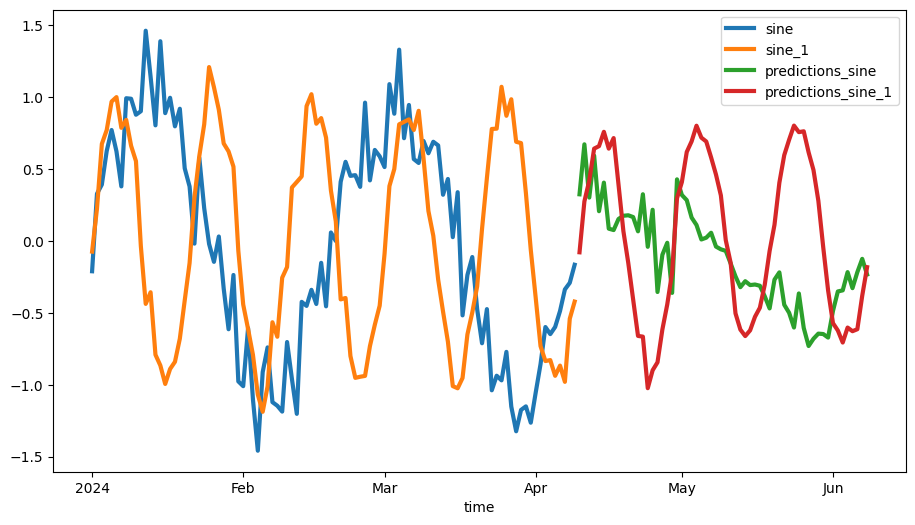

In [10]:
plt.figure(figsize=(11,6))
multivariate_dataset.plot(lw=3)
predictions.plot(lw=3, label="predictions", default_formatting=False)
plt.style.use('default')
